In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Architecture 3 with 3 Convolution Layers 6x6 Kernal







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 888s 15ms/step - loss: 0.1662 - acc: 0.9479 - val_loss: 0.0383 - val_acc: 0.9874
Epoch 2/12
60000/60000 [==============================] - 886s 15ms/step - loss: 0.0424 - acc: 0.9866 - val_loss: 0.0301 - val_acc: 0.9900
Epoch 3/12
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0285 - acc: 0.9916 - val_loss: 0.0266 - val_acc: 0.9914
Epoch 4/12
60000/60000 [==============================] - 886s 15ms/step - loss: 0.0217 - acc: 0.9930 - val_loss: 0.0270 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 887s 15ms/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.0257 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 884s 15ms/step - loss: 0.0133 - acc: 0.9956 - val_loss: 0.0313 - val_acc: 0.9912
Epoch 7/12
6000

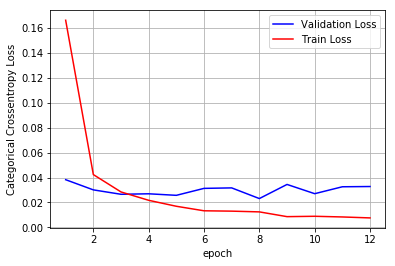

In [0]:
model = Sequential()
model.add(Conv2D(32, (6, 6), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 3 with 3 Convolution Layers 6x6 Kernal + Dropouts in Dense Layer






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1084s 18ms/step - loss: 0.5747 - acc: 0.7857 - val_loss: 0.0540 - val_acc: 0.9839
Epoch 2/12
60000/60000 [==============================] - 1075s 18ms/step - loss: 0.2872 - acc: 0.8905 - val_loss: 0.0348 - val_acc: 0.9895
Epoch 3/12
60000/60000 [==============================] - 1073s 18ms/step - loss: 0.2347 - acc: 0.9117 - val_loss: 0.0355 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 897s 15ms/step - loss: 0.1822 - acc: 0.9345 - val_loss: 0.0277 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 900s 15ms/step - loss: 0.1541 - acc: 0.9449 - val_loss: 0.0249 - val_acc: 0.9935
Epoch 6/12
60000/60000 [============

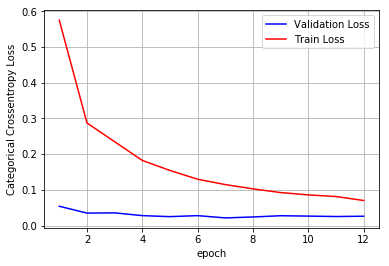

In [0]:
model = Sequential()
model.add(Conv2D(32, (6, 6), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 3 with 3 Convolution Layers 6x6 Kernal + Dropout + Batch Normalization in Dense Layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 862s 14ms/step - loss: 0.4590 - acc: 0.8941 - val_loss: 0.0489 - val_acc: 0.9870
Epoch 2/12
60000/60000 [==============================] - 862s 14ms/step - loss: 0.1351 - acc: 0.9685 - val_loss: 0.0346 - val_acc: 0.9890
Epoch 3/12
60000/60000 [==============================] - 883s 15ms/step - loss: 0.0916 - acc: 0.9757 - val_loss: 0.0231 - val_acc: 0.9923
Epoch 4/12
60000/60000 [==============================] - 872s 15ms/step - loss: 0.0696 - acc: 0.9799 - val_loss: 0.0252 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 859s 14ms/step - loss: 0.0536 - acc: 0.9840 - val_loss: 0.0229 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 860s 14ms/step - loss: 0.0487 - acc: 0.9851 - val_loss: 0.0171 - val_acc: 0.9955
Epoch 7/12
60000/60000 [==============================] - 859s 14ms/step - loss: 0.0410 - acc: 0.9865 - val_loss: 0.

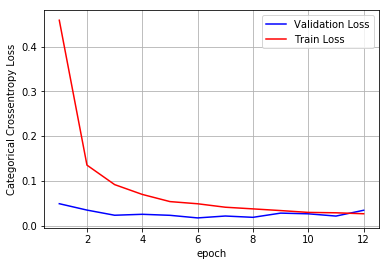

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (6, 6), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 3 with 3 Convolution Layers 6x6 Kernal + Dropouts in Dense Layer and after convolution layers


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 940s 16ms/step - loss: 0.3065 - acc: 0.9159 - val_loss: 0.0469 - val_acc: 0.9869
Epoch 2/12
60000/60000 [==============================] - 920s 15ms/step - loss: 0.0937 - acc: 0.9762 - val_loss: 0.0305 - val_acc: 0.9896
Epoch 3/12
60000/60000 [==============================] - 922s 15ms/step - loss: 0.0687 - acc: 0.9813 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 922s 15ms/step - loss: 0.0572 - acc: 0.9839 - val_loss: 0.0295 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 921s 15ms/step - loss: 0.0514 - acc: 0.9854 - val_loss: 0.0228 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============================] - 929s 15ms/step - loss: 0.0470 - acc: 0.9868 - val_loss: 0.0177 - val_acc: 0.9942
Epoch 7/12
60000/60000 [==============================] - 930s 16ms/step - loss: 0.0418 - acc: 0.9883 - val_loss: 0

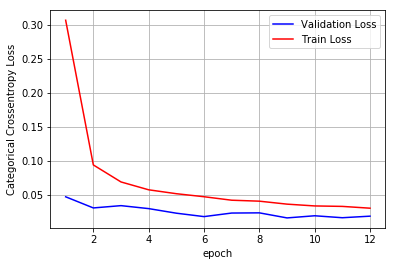

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (6, 6), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (6, 6), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Architecture", "Kernals", "BatchNormalization", "Dropouts", "Loss", "Accuracy"]

x.add_row(["3 Convolution Layers","6x6","No","No","0.0328","0.9912"])
x.add_row(["3 Convolution Layers","6x6","No","Yes","0.0260","0.9939"])
x.add_row(["3 Convolution Layers","6x6","Yes","Yes","0.0342","0.9923"])
x.add_row(["3 Convolution Layers","6x6","Yes","Yes","0.0183","0.9949"])
print(x)

+----------------------+---------+--------------------+----------+--------+----------+
|     Architecture     | Kernals | BatchNormalization | Dropouts |  Loss  | Accuracy |
+----------------------+---------+--------------------+----------+--------+----------+
| 3 Convolution Layers |   6x6   |         No         |    No    | 0.0328 |  0.9912  |
| 3 Convolution Layers |   6x6   |         No         |   Yes    | 0.0260 |  0.9939  |
| 3 Convolution Layers |   6x6   |        Yes         |   Yes    | 0.0342 |  0.9923  |
| 3 Convolution Layers |   6x6   |        Yes         |   Yes    | 0.0183 |  0.9949  |
+----------------------+---------+--------------------+----------+--------+----------+
